In [1]:
# For now Copy and paste the information from the api_keys and run the kernel, then remove them 

In [1]:
# Import Dependenices
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
import requests
import numpy as np


In [6]:
# Read csv file for first person
first_person = pd.read_csv("Resources/Umb_League_19_20.csv")
first_person_df = pd.DataFrame(first_person)
first_person_df.head()

,Level Reached,Champion,Map,Kills,Deaths,Assists,Minions,Money Earned,Date Played
0,16,Ornn,Howling Abyss,4,9,27,38,9.9k,10/24/2020
1,15,Ezreal,Howling Abyss,8,11,10,38,10.7k,10/24/2020
2,14,Karma,Howling Abyss,8,9,10,26,10.1k,10/24/2020
3,17,Sett,Howling Abyss,5,7,25,34,10.8k,10/24/2020
4,18,Veigar,Howling Abyss,11,10,17,79,12.8k,10/23/2020


In [7]:
# Read csv file for second person
second_person = pd.read_csv("Resources/Rob_League_19_20.csv")
second_person_df = pd.DataFrame(second_person)
second_person.head()

,Level Reached,Champion,Map,Kills,Deaths,Assists,Minions,Money Earned,Date Played
0,16,Senna,Howling Abyss,8,4,22,15,10.2k,10/27/2020
1,18,Cho'Gath,Howling Abyss,11,8,20,47,12.6k,10/27/2020
2,18,Zilean,Howling Abyss,4,12,14,49,12.4k,10/27/2020
3,18,Nidalee,Howling Abyss,22,7,19,54,19.8k,10/27/2020
4,15,Xayah,Howling Abyss,7,10,12,46,10.3k,10/27/2020


In [9]:
# Combine csv files into one dataframe and sort to show bundles
combined_df = pd.merge(first_person_df, second_person_df, on = "Champion", how = "outer")
# sorted_df = combined_df.sort_values(["Champion_x", "Champion_y"], ascending = (True, True))
# sorted_df
combined_df.head()

,Level Reached_x,Champion,Map_x,Kills_x,Deaths_x,Assists_x,Minions_x,Money Earned_x,Date Played_x,Level Reached_y,Map_y,Kills_y,Deaths_y,Assists_y,Minions_y,Money Earned_y,Date Played_y
0,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020
1,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,15.0,Howling Abyss,2.0,5.0,14.0,60.0,11.6k,7/14/2019
2,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,14.0,Howling Abyss,4.0,12.0,20.0,37.0,10.6k,7/8/2019
3,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,16.0,Howling Abyss,8.0,14.0,22.0,67.0,14.6k,7/7/2019
4,18.0,Ornn,Howling Abyss,5.0,12.0,20.0,35.0,11.6k,7/11/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020


In [10]:
# unique champions
unique = combined_df[["Champion"]].nunique()
unique

Champion    141
dtype: int64

In [12]:
# Format table to look cleaner
cleaner_data_df = combined_df.rename(columns ={"Level Reached_x": "Umb12eon's Level",
                                      "Level Reached_y": "Justrob's Level",
                                      "Map_x": "Map One Played",
                                      "Map_y" : "Map Two Played",
                                      "Kills_x": "Umb12eon's Kills",
                                      "Kills_y": "Justrob86's Kills",
                                      "Deaths_x": "Umb12eon's Deaths",
                                      "Deaths_y": "Justrob86's Deaths",
                                      "Assists_x": "Umb12eon's Assists",
                                      "Assists_y": "Justrob86's Assists",
                                      "Minions_x": "Umb12eon's Minions",
                                      "Minions_y": "Justrob86's Minions",
                                      "Money Earned_x": "Umb12eon's Money",
                                      "Money Earned_y": "Justrob86's Money",  
                                      "Date Played_x": "Dates Umb12eon Played",
                                      "Date Played_y": "Dates Justrob86 Played"})
cleaner_data_df.sort_values(by="Champion").head()

,Umb12eon's Level,Champion,Map One Played,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,Umb12eon's Minions,Umb12eon's Money,Dates Umb12eon Played,Justrob's Level,Map Two Played,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,Justrob86's Minions,Justrob86's Money,Dates Justrob86 Played
7109,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
7106,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7108,14.0,Aatrox,Howling Abyss,8.0,10.0,7.0,29.0,10.0k,6/8/2020,18.0,Howling Abyss,3.0,17.0,21.0,24.0,15.1k,7/17/2020
7107,18.0,Aatrox,Howling Abyss,8.0,17.0,20.0,15.0,12.6k,7/11/2020,13.0,Howling Abyss,4.0,9.0,9.0,27.0,11.2k,4/12/2020
4347,14.0,Ahri,Howling Abyss,6.0,14.0,12.0,28.0,12.8k,2/12/2020,15.0,Howling Abyss,13.0,6.0,17.0,39.0,12.2k,3/14/2020


In [13]:
# Drop N/A values
dropped_na_df = cleaner_data_df.dropna()
dropped_na_df


,Umb12eon's Level,Champion,Map One Played,Umb12eon's Kills,Umb12eon's Deaths,Umb12eon's Assists,Umb12eon's Minions,Umb12eon's Money,Dates Umb12eon Played,Justrob's Level,Map Two Played,Justrob86's Kills,Justrob86's Deaths,Justrob86's Assists,Justrob86's Minions,Justrob86's Money,Dates Justrob86 Played
0,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020
1,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,15.0,Howling Abyss,2.0,5.0,14.0,60.0,11.6k,7/14/2019
2,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,14.0,Howling Abyss,4.0,12.0,20.0,37.0,10.6k,7/8/2019
3,16.0,Ornn,Howling Abyss,4.0,9.0,27.0,38.0,9.9k,10/24/2020,16.0,Howling Abyss,8.0,14.0,22.0,67.0,14.6k,7/7/2019
4,18.0,Ornn,Howling Abyss,5.0,12.0,20.0,35.0,11.6k,7/11/2020,11.0,Howling Abyss,2.0,8.0,7.0,31.0,14.0k,2/6/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8141,15.0,Katarina,Howling Abyss,5.0,9.0,13.0,24.0,10.5k,2/14/2019,15.0,Howling Abyss,10.0,11.0,9.0,58.0,15.0k,9/12/2019
8142,15.0,Katarina,Howling Abyss,5.0,9.0,13.0,24.0,10.5k,2/14/2019,16.0,Howling Abyss,8.0,5.0,23.0,30.0,9.6k,9/7/2019
8143,15.0,Katarina,Howling Abyss,5.0,9.0,13.0,24.0,10.5k,2/14/2019,18.0,Howling Abyss,7.0,3.0,13.0,16.0,10.0k,6/8/2019
8144,15.0,Katarina,Howling Abyss,5.0,9.0,13.0,24.0,10.5k,2/14/2019,16.0,Howling Abyss,5.0,11.0,22.0,28.0,12.1k,4/14/2019


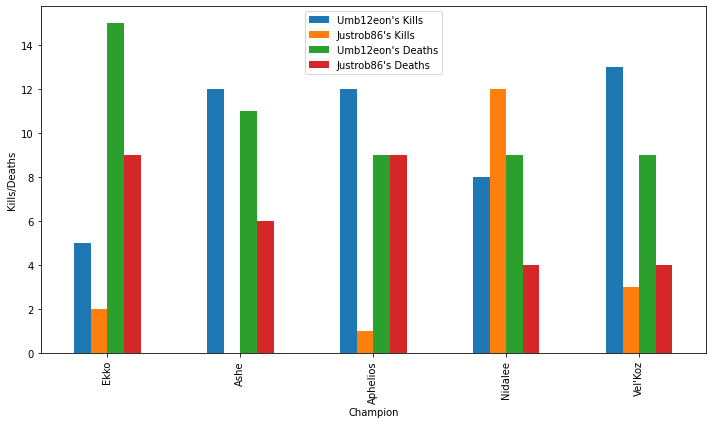

In [11]:
# Bar chart with pandas
champion_kills = dropped_na_df[["Champion","Umb12eon's Kills","Justrob86's Kills", 
                                "Umb12eon's Deaths", "Justrob86's Deaths"]]
champion_kills = champion_kills.set_index("Champion")
champion_kills.plot(kind = "bar", figsize = (10,6))
plt.ylabel("Kills/Deaths")
plt.tight_layout()
plt.savefig("Images/Same_Champion_Comparison.png")

In [12]:
# Bar chart with MPL
# plt.figure(10,6)
# x_axis = np.arange(len(dropped_na_df))
# tick_locations = [value for value in x_axis]
# plt.bar(x_axis, dropped_na_df["Umb12eon's Kills"], alpha = 0.5, align = "center")
# plt.xlabel("Champion")
# plt.ylabel("Number of Kills/Deaths")
# plt.xticks(tick_locations, dropped_na_df["Champion"], rotation = "vertical")
# plt.show()

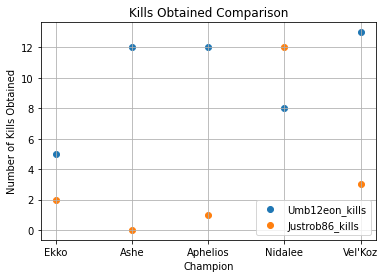

In [14]:
# Scatter plot showing difference in amount of kills obtained
x_axis = ["Ekko", "Ashe", "Aphelios", "Nidalee", "Vel'Koz"]
Umb12eon_kills = [5, 12, 12, 8, 13]
Justrob86_kills = [2, 0, 1, 12, 3]
plt.xlabel("Champion")
plt.ylabel("Number of Kills Obtained")
plt.scatter(x_axis, Umb12eon_kills)
plt.scatter(x_axis, Justrob86_kills)
plt.title("Kills Obtained Comparison")
plt.grid()
plt.legend(["Umb12eon_kills", "Justrob86_kills"], loc = "best")
plt.savefig("Images/Kills_Obtained_Comparison.png")
plt.show()

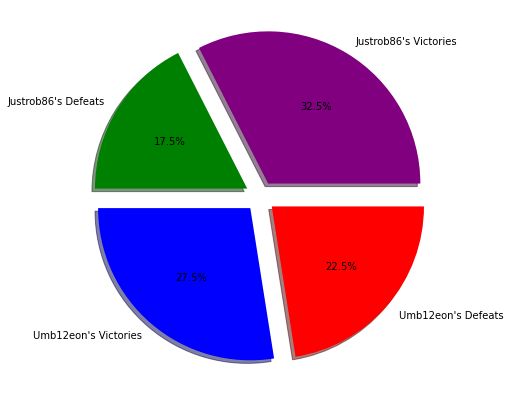

In [15]:
# Pie chart with MPL
labels = ["Umb12eon's Victories", "Umb12eon's Defeats", "Justrob86's Victories", "Justrob86's Defeats"]
sizes = [11,9,13,7]
colors = ["Blue", "Red", "Purple", "Green"]
explode = [0.1,0.1,0.1,0.1]
plt.pie(sizes, explode = explode, labels=labels, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 180)
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.savefig("Images/End_game_comparison.png")
plt.show()

In [30]:
#Top Champions url for Umb12eon
champions_one_url = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + my_encrypted_id + "?" + "api_key=" + api_key
champions_response_one = requests.get(champions_one_url).json()
champions_response_one

{'status': {'message': 'Forbidden', 'status_code': 403}}

In [22]:
# Grab the top 10 champions for Umb12eon
umb12eon_top_10 = []

    

In [29]:
# Top champions url for Justrob86
champions_two_url = "https://na1.api.riotgames.com/lol/champion-mastery/v4/champion-masteries/by-summoner/" + second_encrypted_id + "?" + "api_key=" + api_key
champions_response_two = requests.get(champions_two_url).json()
champions_response_two

{'status': {'message': 'Forbidden', 'status_code': 403}}

In [333]:
# Grab the top 10 champions for Justrob86
justrob86_top_10 = []
